# K-最近傍法(KNeighborsClassifier)モデルでの回帰

K-最近傍法は理解しやすいアルゴリズムであるが、訓練データや特徴量が多くなると計算量が大きくなるデメリットがある。

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('sklearn version : ' + sklearn.__version__)

sklearn version : 0.24.0


## データセットの読み込み

In [9]:
import mglearn

X, y = mglearn.datasets.make_wave(n_samples=40)
print('X.shape : ', X.shape)
print('y.shape : ', y.shape)
print('X : \n', X[:5])
print('y : \n', y[:5])

X.shape :  (40, 1)
y.shape :  (40,)
X : 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
y : 
 [-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (30, 1)
X_test.shape :  (10, 1)
y_train.shape :  (30,)
y_test.shape :  (10,)


Text(0, 0.5, 'Target')

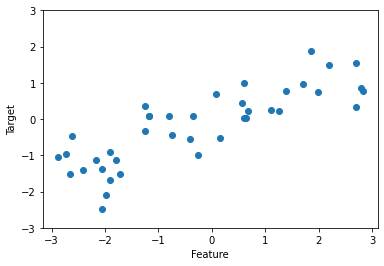

In [4]:
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

## K-最近傍法(KNeighborsClassifier)モデルでの予測

K=1の場合入力データに最も近い訓練データの出力と同じ値が出力される

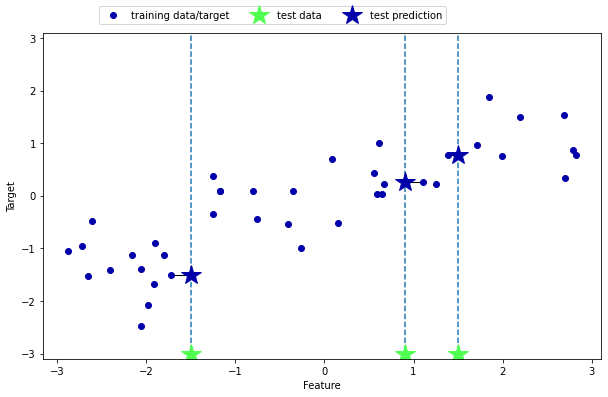

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

nが複数の場合は最近傍点の平均値を用いる

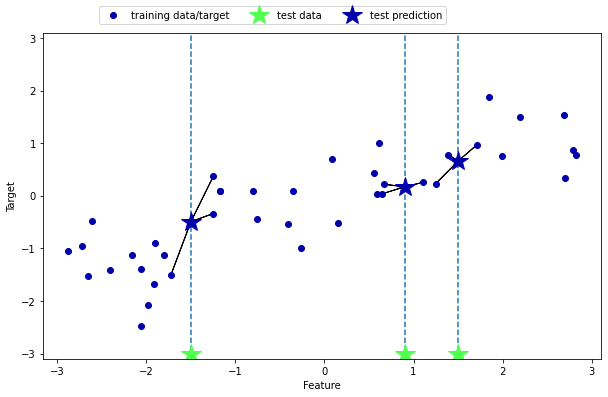

In [12]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

## モデルの学習

In [14]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

## モデルの評価

In [15]:
knr.score(X_test, y_test)

0.8344172446249605

## モデルの分析

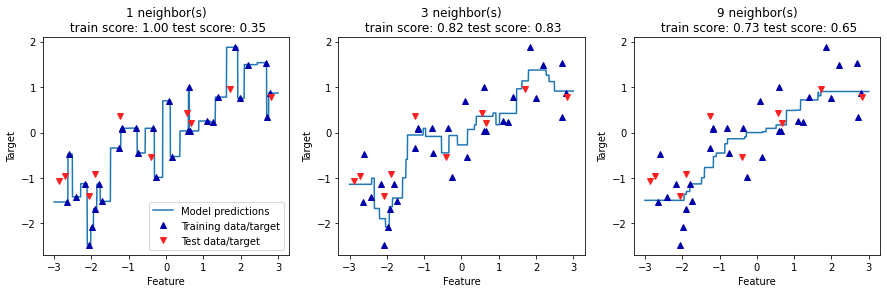

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0))
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1))

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")